# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

# **3. Exploratory Data Analysis**


In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

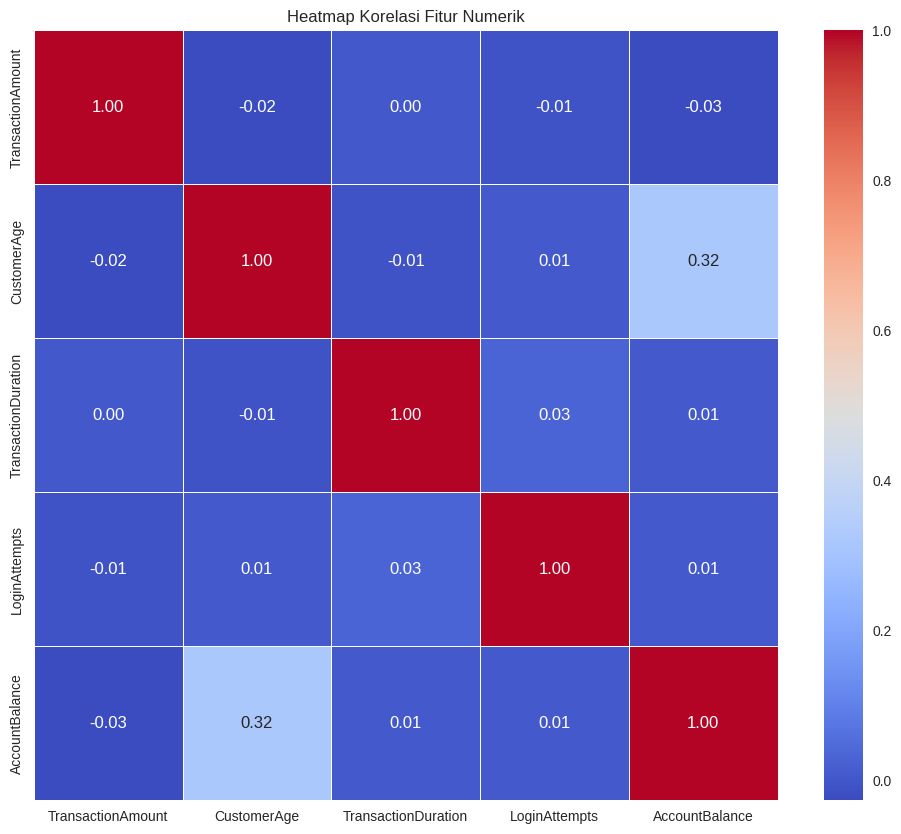

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Heatmap korelasi untuk fitur numerik
num_features = df.select_dtypes(include=['float64'])
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()


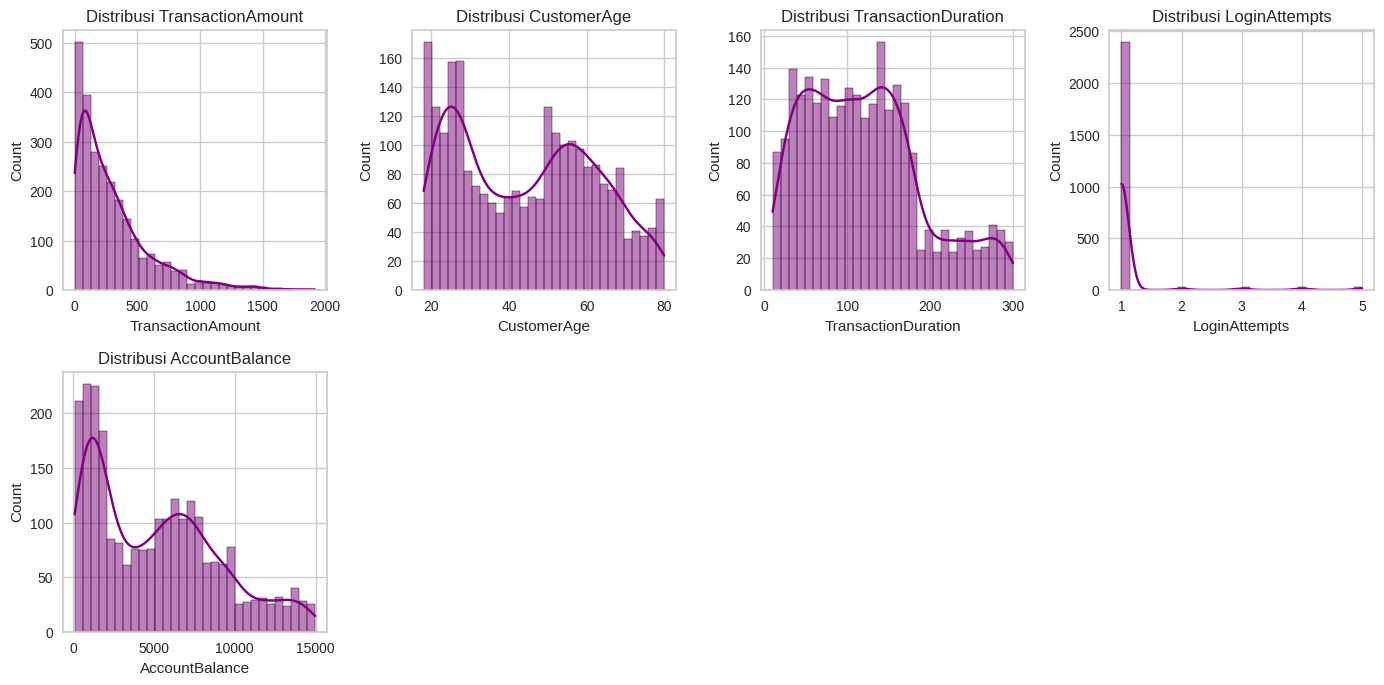

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

/tmp/ipython-input-985677572.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-985677572.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-985677572.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


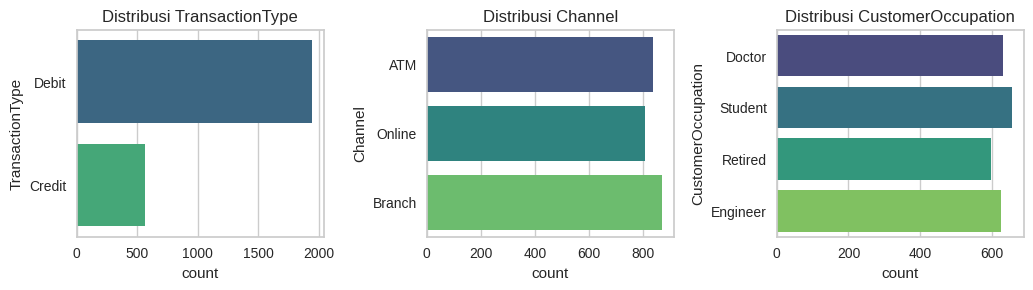

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Visualisasi untuk fitur kategorikal
cat_features = ['TransactionType', 'Channel', 'CustomerOccupation']
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

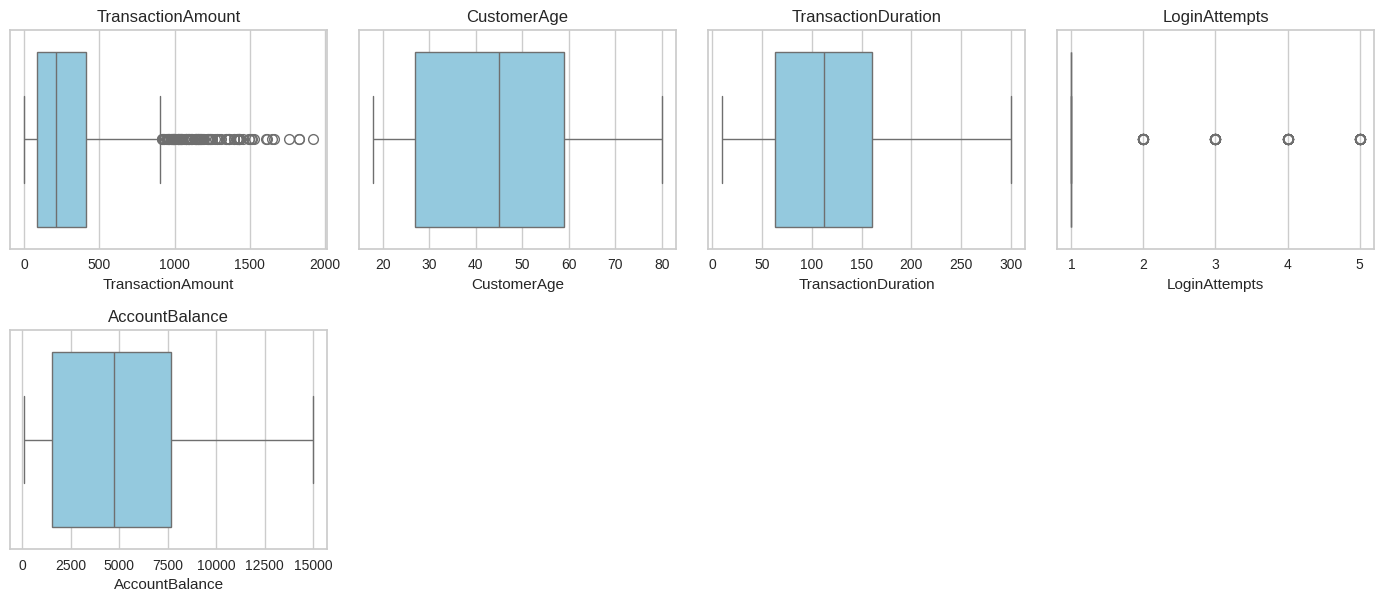

In [ ]:
# Cek outlier
n_features = len(num_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(14, n_rows * 3))

for i, column in enumerate(num_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(column)

plt.tight_layout()
plt.show()

# **4. Pembersihan Dataset**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
fitur_numerik = ['TransactionDuration', 'LoginAttempts']
fitur_numerik_binning = ['TransactionAmount','CustomerAge','AccountBalance']
scaler = StandardScaler()
scaler_binning = StandardScaler()
df[fitur_numerik] = scaler.fit_transform(df[fitur_numerik])
df[fitur_numerik_binning] = scaler_binning.fit_transform(df[fitur_numerik_binning])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'], axis=1)

In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
# Pilih fitur kategorikal
fitur_kategorikal = ['TransactionDate','TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']

encoders = {}
for col in fitur_kategorikal:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le   # simpan encoder sesuai kolom
df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,NaN,3,1.121495,-0.204629,0.594263,16


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

# **5. Data Preprocessing**

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df[fitur_numerik] = df[fitur_numerik].fillna(df[fitur_numerik].median())
df[fitur_numerik_binning] = df[fitur_numerik_binning].fillna(df[fitur_numerik_binning].median())
df[fitur_kategorikal] = df[fitur_kategorikal].fillna(df[fitur_kategorikal].median().iloc[0])

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

In [ ]:
# Cek kembali dataset
df.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Mengatasi / mengidentifikasi outliers menggunakan IQR Pada data frame

Q1 = df[fitur_numerik].quantile(0.25)
Q3 = df[fitur_numerik].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan nilai batas
for feature in fitur_numerik:
    df.loc[df[feature] < lower_bound[feature], feature] = lower_bound[feature]
    df.loc[df[feature] > upper_bound[feature], feature] = upper_bound[feature]

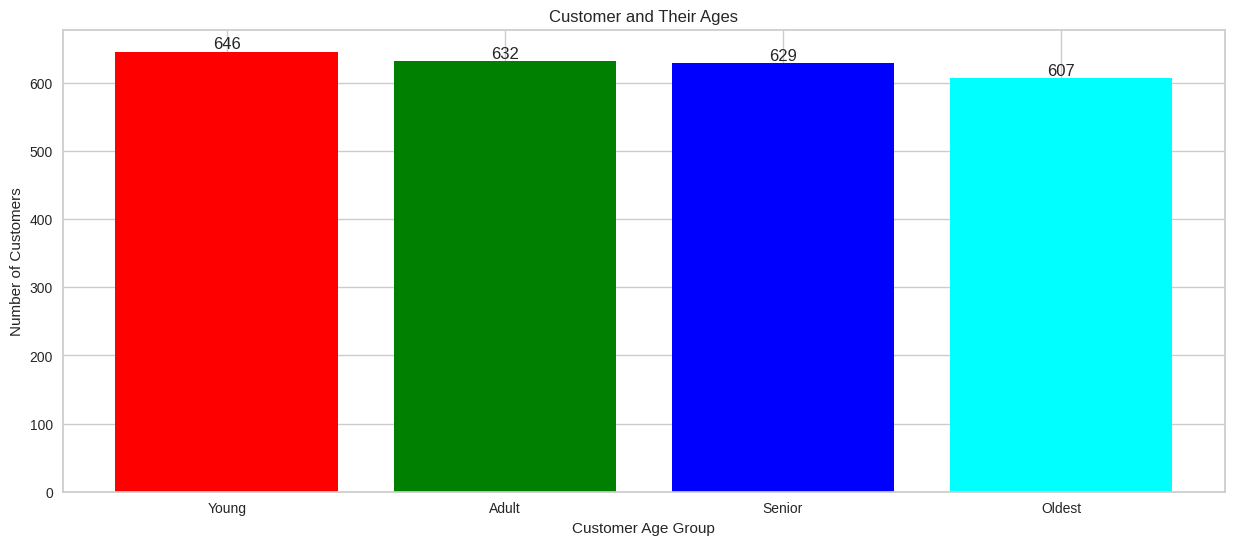

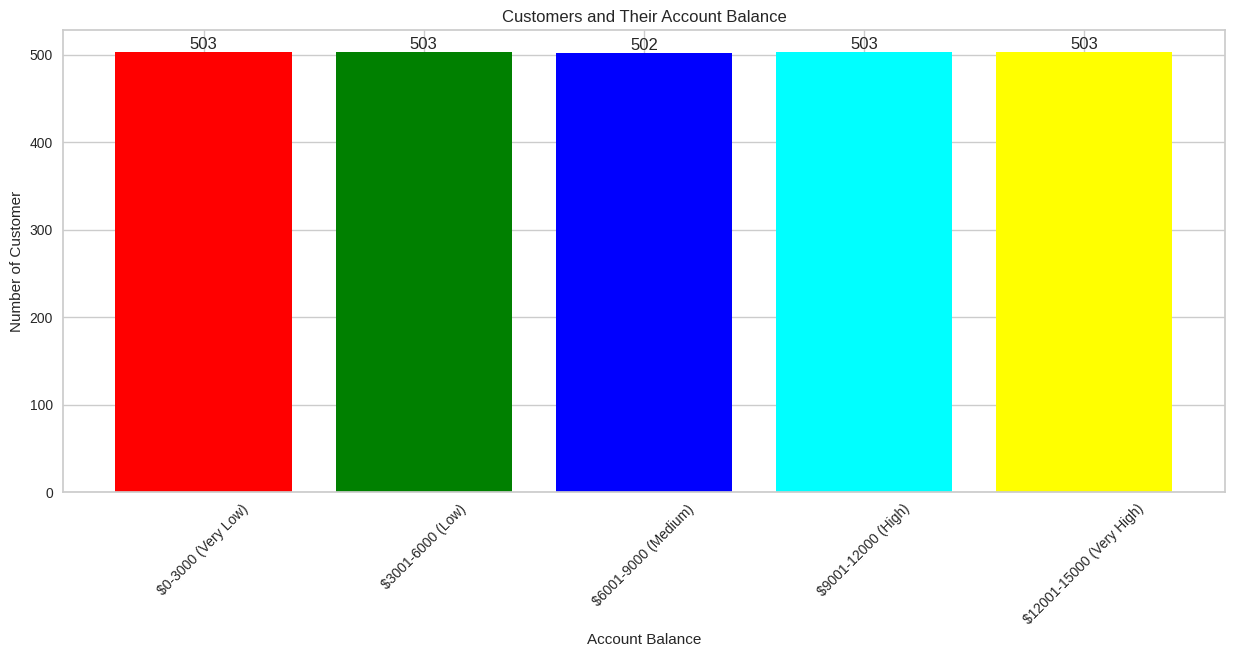

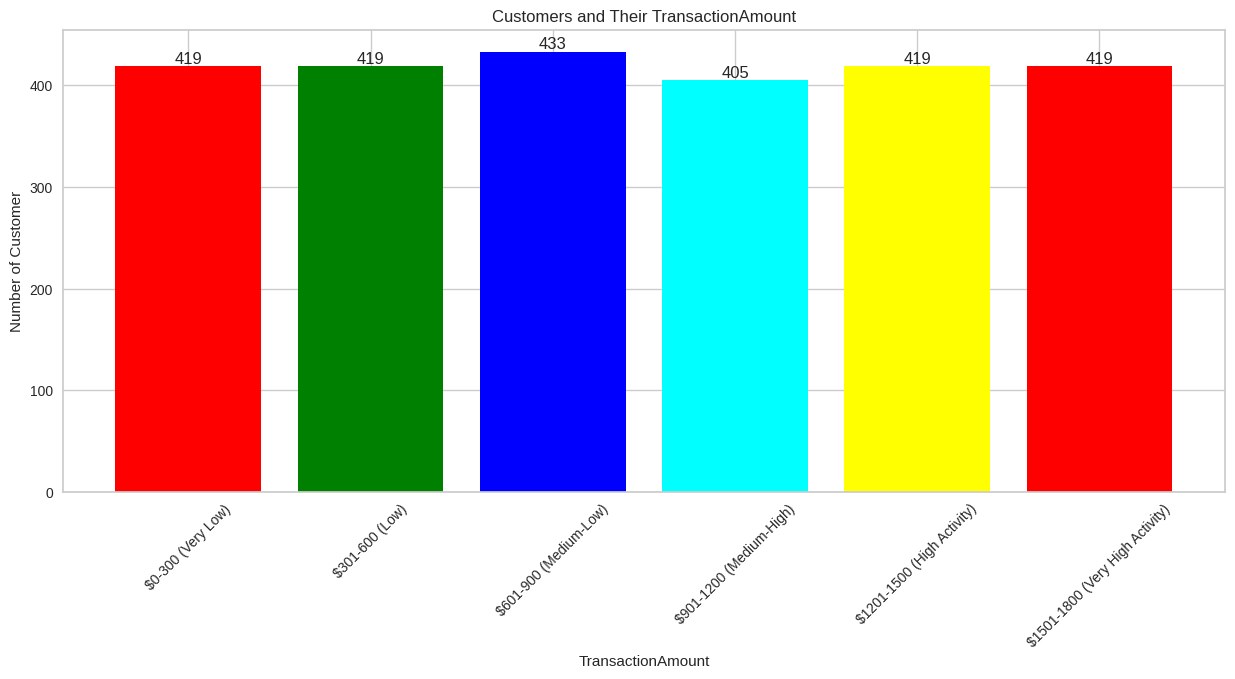

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Binning dengan qcut
df['CustomerAge'] = pd.qcut(df['CustomerAge'], q=4, labels=['Young', 'Adult', 'Senior', 'Oldest'])

# Hitung jumlah masing-masing kelompok
age_counts = df['CustomerAge'].value_counts().sort_index()

# Menyusun data untuk plotting
x = age_counts.index.tolist()
y = age_counts.values.tolist()

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan'])
plt.title("Customer and Their Ages")
plt.xlabel("Customer Age Group")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()


#melakukan binning transaction amount
df["AccountBalance"] = pd.qcut(df["AccountBalance"], q=5,labels=["$0-3000 (Very Low)", "$3001-6000 (Low)", "$6001-9000 (Medium)", "$9001-12000 (High)", "$12001-15000 (Very High)"])

# Hitung jumlah masing-masing kelompok
ab_counts = df['AccountBalance'].value_counts().sort_index()

# Menyusun data untuk plotting
abx= ab_counts.index.tolist()
aby = ab_counts.values.tolist()


# Membuat bar chart untuk distribusi Saldo Rekening Customer
plt.figure(figsize=(15, 6))
plt.bar(abx, aby, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customers and Their Account Balance")
plt.xlabel("Account Balance")
plt.ylabel("Number of Customer")
plt.xticks(rotation=45)

# Menambahkan label jumlah Customer di atas bar
for i in range(len(abx)):
  plt.text(i, aby[i],aby[i], ha='center', va='bottom' )

plt.show()


#melakukan binning transaction amount
df['TransactionAmount'] = pd.qcut(df['TransactionAmount'], q=6,labels=["$0-300 (Very Low)", "$301-600 (Low)", "$601-900 (Medium-Low)", "$901-1200 (Medium-High)", "$1201-1500 (High Activity)", "$1501-1800 (Very High Activity)"])

# Hitung jumlah masing-masing kelompok
ta_counts = df['TransactionAmount'].value_counts().sort_index()

# Menyusun data untuk plotting
tax= ta_counts.index.tolist()
tay = ta_counts.values.tolist()

# Membuat bar chart untuk distibusi jumlah transaksi
# Membuat bar chart untuk distribusi Saldo Rekening Customer
plt.figure(figsize=(15, 6))
plt.bar(tax, tay, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customers and Their TransactionAmount")
plt.xlabel("TransactionAmount")
plt.ylabel("Number of Customer")
plt.xticks(rotation=45)

for i in range(len(tax)):
  plt.text(i, tay[i],tay[i], ha='center', va='bottom' )

plt.show()


# Encoding Data Kategorikal Binning
categorical_binning = ['AccountBalance','CustomerAge','TransactionAmount']
encoder_bin={}

# Encoding Data Kategorikal
for col in categorical_binning:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoder_bin[col] = le  # Menyimpan encoder jika diperlukan nanti

# **6. Menentukan Jumlah Clsuter**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2.514000e+03,2514.000000,2514.000000
mean,2.494431,1256.328958,0.787987,21.284010,1.01074,1.512729,1.530231,0.000702,-2.046294e-01,1.999602,180.889021
std,1.701620,725.581982,0.437042,12.397534,0.83084,1.125632,1.150477,0.994014,1.052146e-14,1.414636,103.956287
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.561745,-2.046294e-01,0.000000,0.000000
25%,1.000000,628.250000,1.000000,11.000000,0.00000,0.000000,0.250000,-0.805299,-2.046294e-01,1.000000,91.250000
50%,2.500000,1256.500000,1.000000,21.000000,1.00000,2.000000,2.000000,-0.105944,-2.046294e-01,2.000000,181.000000
75%,4.000000,1884.750000,1.000000,32.000000,2.00000,3.000000,3.000000,0.593411,-2.046294e-01,3.000000,272.000000
max,5.000000,2485.000000,2.000000,43.000000,3.00000,3.000000,4.000000,2.577295,-2.046294e-01,4.000000,360.000000


      AccountBalance  TransactionAmount  CustomerOccupation  CustomerAge
0                  3                  0                   0            1
1                  1                  1                   0            1
2                  0                  4                   3            3
3                  1                  4                   3            3
4                  4                  0                   3            0
...              ...                ...                 ...          ...
2509               3                  0                   2            2
2510               2                  4                   3            3
2511               0                  5                   3            3
2524               4                  5                   1            0
2535               0                  4                   3            3

[2514 rows x 4 columns]


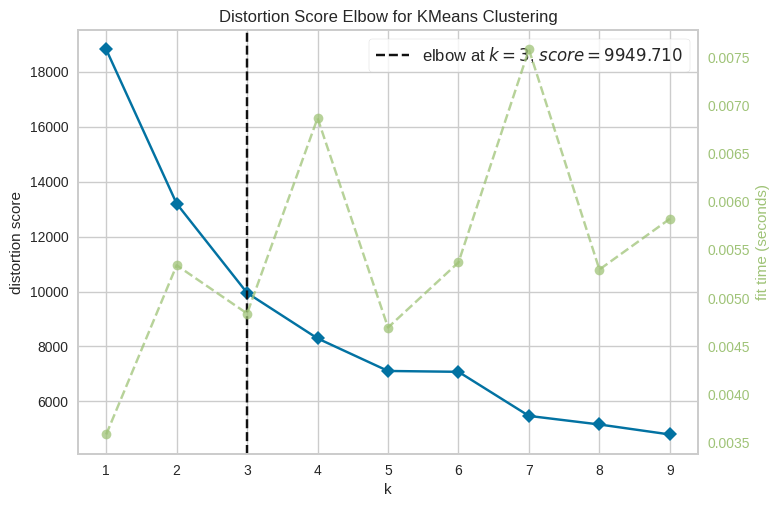

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df[['AccountBalance', 'TransactionAmount', 'CustomerOccupation', 'CustomerAge']]

print(pd.DataFrame(X, columns=['AccountBalance', 'TransactionAmount', 'CustomerOccupation', 'CustomerAge']))

k_means = KMeans()

visualizer = KElbowVisualizer(k_means, k=(1,10))
visualizer.fit(X)
visualizer.show()

# **7. Membangun Model Clustering**

In [ ]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters= 4, random_state=42, n_init=10)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 4

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_balance = cluster_data['AccountBalance'].mean()  # Rata-rata AccountBalance
        mean_amount = cluster_data['TransactionAmount'].mean()  # Rata-rata TransactionAmount
        mean_occupation = cluster_data['CustomerOccupation'].mean()  # Rata-rata CustomerOccupation
        mean_age = cluster_data['CustomerAge'].mean()  # Rata-rata CustomerAge


        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata AccountBalance: {mean_balance:.2f}")
        print(f"Rata-rata TransactionAmount: {mean_amount:.2f}")
        print(f"Rata-rata CustomerOccupation: {mean_occupation:.2f}")
        print(f"Rata-rata CustomerAge: {mean_age:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata AccountBalance: 0.86
Rata-rata TransactionAmount: 3.41
Rata-rata CustomerOccupation: 0.43
Rata-rata CustomerAge: 0.84

Cluster 2:
Rata-rata AccountBalance: 2.59
Rata-rata TransactionAmount: 0.81
Rata-rata CustomerOccupation: 1.25
Rata-rata CustomerAge: 1.20

Cluster 3:
Rata-rata AccountBalance: 3.23
Rata-rata TransactionAmount: 4.03
Rata-rata CustomerOccupation: 1.43
Rata-rata CustomerAge: 1.18

Cluster 4:
Rata-rata AccountBalance: 0.66
Rata-rata TransactionAmount: 2.69
Rata-rata CustomerOccupation: 3.00
Rata-rata CustomerAge: 2.94


Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(X, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhoutte_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhoutte_avg}")

Silhouette Score: 0.3033579958299803


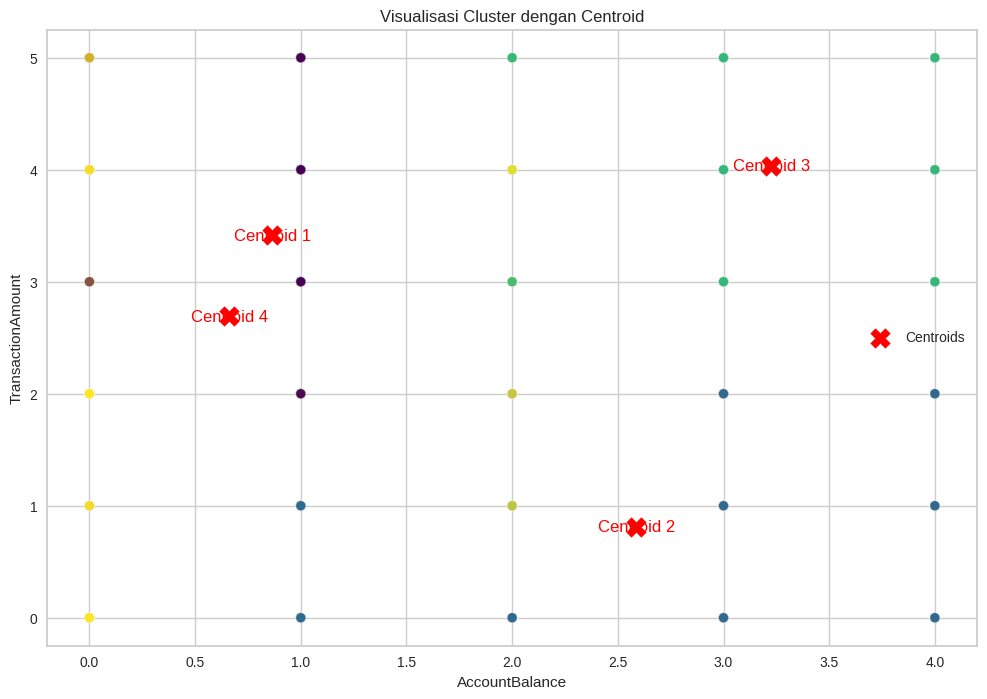

Nilai Centroids:
Centroid 1: AccountBalance = 0.86, TransactionAmount = 3.41
Centroid 2: AccountBalance = 2.59, TransactionAmount = 0.81
Centroid 3: AccountBalance = 3.23, TransactionAmount = 4.03
Centroid 4: AccountBalance = 0.66, TransactionAmount = 2.69


In [ ]:
# Membuat visualisasi hasil clustering
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(X['AccountBalance'], X['TransactionAmount'], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('AccountBalance')
plt.ylabel('TransactionAmount')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: AccountBalance = {centroid[0]:.2f}, TransactionAmount = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
# tambahkan label Cluster pada  DataFrame
df['cluster'] = labels


# Pilih hanya Kolom numerik dan Cluster
cluster_data = df[fitur_numerik + ['cluster']]

cluster_analysis = cluster_data.groupby('cluster')[fitur_numerik].agg(['mean', 'min', 'max'])

print("Analisis Karakteristik Tiap Cluster (mean, min, max):")
print(cluster_analysis)

# Dapatkan statistik deskriptif untuk kolom numerik di setiap cluster
for cluster, data in df.groupby('cluster'):
    print(f"Cluster {cluster}:")
    print(data.describe())  # Menampilkan statistik deskriptif untuk semua kolom numerik
    print("\n") # Memberikan baris kosong untuk pemisahan yang lebih baik

Analisis Karakteristik Tiap Cluster (mean, min, max):
        TransactionDuration                     LoginAttempts            \
                       mean       min       max          mean       min   
cluster                                                                   
0                 -0.009658 -1.561745  2.577295     -0.204629 -0.204629   
1                  0.001335 -1.561745  2.577295     -0.204629 -0.204629   
2                 -0.016457 -1.561745  2.563023     -0.204629 -0.204629   
3                  0.027395 -1.547472  2.563023     -0.204629 -0.204629   

                   
              max  
cluster            
0       -0.204629  
1       -0.204629  
2       -0.204629  
3       -0.204629  
Cluster 0:
       TransactionAmount  TransactionDate  TransactionType    Location  \
count         465.000000       465.000000       465.000000  465.000000   
mean            3.412903      1241.615054         0.774194   21.066667   
std             1.120655       722.364875      

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Nasabah dengan saldo rekening dan jumlah transaksi rendah dan usia muda)**:
  - **Rata-rata (mean) TransactionAmount :** 3 (Medium Low Activity)
  - **Rata-rata (mean) CustomerAge :** 0 (Young)
  - **Rata-rata (mean) AccountBalance :** 0 ($ 0 - 3.000 Very Low)<Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini di dominasi oleh nasabah yang memiliki saldo rekening dan jumlah transakksi rendah. Usia rata-rata nasabah di cluster ini di dominasi oleh anak-anak muda.


2. **Cluster 2: (Nasabah dengan saldo rekening dan jumlah transaksi rendah)**:
  - **Rata-rata (mean) TransactionAmount :** 0 (Low Activity)
  - **Rata-rata (mean) CustomerAge :** 1 (Adult)
  - **Rata-rata (mean) AccountBalance :** 2 ($ 3.001 - 6.000 Low)<Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini di dominasi oleh nasabah yang memiliki saldo rekening dan jumlah transakksi rendah. Usia rata-rata nasabah di cluster ini serupa dengan cluster 1 (orang dewasa).


3. **Cluster 3: (Nasabah dengan saldo rekening dan jumlah transaksi tinggi)**:
  - **Rata-rata (mean) TransactionAmount :** 4 (High Activity)
  - **Rata-rata (mean) CustomerAge :** 1 (Adult)
  - **Rata-rata (mean) AccountBalance :** 3 ($ 9.001 - 12.000 High)<Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini di dominasi oleh nasabah yang memiliki saldo rekening dan jumlah transakksi tinggi. Usia rata-rata nasabah di cluster ini di dominasi orang dewasa.



4. **Cluster 4: (Nasabah dengan saldo rekening rendah dan jumlah transaksi sedang )**:
  - **Rata-rata (mean) TransactionAmount :** 2 (Medium )
  - **Rata-rata (mean) CustomerAge :** 2 (Senior)
  - **Rata-rata (mean) AccountBalance :** 0 ($ 0 - 3.000 Very Low)<Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini di dominasi oleh nasabah yang memiliki saldo rekening rendah dan jumlah transakksi sedang. Usia rata-rata nasabah di cluster ini di dominasi oleh para orang tua.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'cluster': 'Target'})

In [ ]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
df[fitur_numerik] = scaler.inverse_transform(df[fitur_numerik])

# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,0,680,1,36,0,1,0,81.0,1.0,3,105,1
1,1,1178,1,15,0,1,0,141.0,1.0,1,192,1
2,4,1262,1,23,2,3,3,56.0,1.0,0,41,3
3,4,818,1,33,2,3,3,25.0,1.0,1,163,3
4,0,1939,0,1,2,0,3,198.0,1.0,4,16,1


In [ ]:
# inverse dataset that has been encoded into its original category.
# Complete the following code if you want to apply this criterion (please remove the hash symbol from the code to be used.)

for col in fitur_kategorikal:
    df[col] = encoders[col].inverse_transform(df[col])

for col in categorical_binning:
    df[col] = encoder_bin[col].inverse_transform(df[col])

# display the dataset that has been inverse transformed
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,$0-300 (Very Low),2023-04-11 16:29:14,Debit,San Diego,ATM,Oldest,Doctor,81.0,1.0,$6001-9000 (Medium),2024-11-04 08:08:08,1
1,$1201-1500 (High Activity),2023-06-27 16:44:19,Debit,Houston,ATM,Oldest,Doctor,141.0,1.0,$12001-15000 (Very High),2024-11-04 08:09:35,1
2,$601-900 (Medium-Low),2023-07-10 18:16:08,Debit,Mesa,Online,Young,Student,56.0,1.0,$0-3000 (Very Low),2024-11-04 08:07:04,3
3,$601-900 (Medium-Low),2023-05-05 16:32:11,Debit,Raleigh,Online,Young,Student,25.0,1.0,$12001-15000 (Very High),2024-11-04 08:09:06,3
4,$0-300 (Very Low),2023-10-16 17:51:24,Credit,Atlanta,Online,Adult,Student,198.0,1.0,$9001-12000 (High),2024-11-04 08:06:39,1


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
#analisis untuk numerik
df_grouped_num = df.groupby('Target')[fitur_numerik].agg(['mean', 'min', 'max'])

# analisis untuk kategorikal (pakai mode)
df_grouped_cat = df.groupby('Target')[fitur_kategorikal + categorical_binning].agg(lambda x: x.mode()[0])

print("Analisis Deskriptif Setelah Inverse:")
display(df_grouped_num)
display(df_grouped_cat)

Analisis Deskriptif Setelah Inverse:


TransactionDuration              LoginAttempts          
                      mean   min    max          mean  min  max
Target                                                         
0               118.746237  10.0  300.0           1.0  1.0  1.0
1               119.516496  10.0  300.0           1.0  1.0  1.0
2               118.269919  10.0  299.0           1.0  1.0  1.0
3               121.342342  11.0  299.0           1.0  1.0  1.0

,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,AccountBalance,CustomerAge,TransactionAmount
Target,,,,,,,,,
0,2023-01-02 17:05:16,Debit,Memphis,Branch,Doctor,2024-11-04 08:08:14,$12001-15000 (Very High),Adult,$301-600 (Low)
1,2023-01-02 16:01:14,Debit,Colorado Springs,ATM,Retired,2024-11-04 08:11:10,$6001-9000 (Medium),Oldest,$0-300 (Very Low)
2,2023-12-28 17:31:03,Debit,Philadelphia,Branch,Retired,2024-11-04 08:09:17,$9001-12000 (High),Oldest,$901-1200 (Medium-High)
3,2023-01-02 16:00:06,Debit,Miami,ATM,Student,2024-11-04 08:07:18,$0-3000 (Very Low),Young,$1501-1800 (Very High Activity)


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Nasabah dengan saldo rekening tinggi dan jumlah transaksi menengah-tinggi)**:
  - ** TransactionAmount :**   301- 600 (Low)
  - ** CustomerAge :** Adult (Dewasa)
  - ** AccountBalance :** $ 12001 - 15000 (Very High)
  - ** CustomerOccupation :** Doctor
  - ** Location :** Memphis<Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration :** 118.7
  - **Rata-rata (mean) LoginAttempts :** 1
  - **Analisis:** Cluster ini di dominasi oleh nasabah yang memiliki saldo rekening sangat tinggi dan jumlah transaksi rendah. Usia rata-rata nasabah di cluster ini di dominasi oleh orang dewasa dan memiliki pekerjaan dokter, dan tempat tinggal di daerah Memphis.


2. **Cluster 2: (Nasabah dengan saldo rekening tinggi dan jumlah transaksi menengah-tinggi)**:
  - **TransactionAmount :**  0 -300 (Very Low)
  - **CustomerAge :** Oldest (Lansia)
  - **AccountBalance :** $ $ 6001 - 9000 (Medium)
  - **CustomerOccupation :** Retired
  - **Location :** New York<Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration :** 119.5
  - **Rata-rata (mean) LoginAttempts :** 1
  - **Analisis:** Cluster ini di dominasi oleh nasabah yang memiliki saldo rekening menengah dan jumlah transasi cukup rendah. Usia rata-rata nasabah di cluster ini di dominasi oleh lansia yang sudah pensiun dan tempat tinggal di daerah New York.


3. **Cluster 3: (Nasabah dengan saldo rekening tinggi dan jumlah transaksi menengah-tinggi)**:
  - **TransactionAmount:**  9.001 - 12.000 (Medium-High)
  - **CustomerAge:** Oldest (Lansia)
  - **AccountBalance:** $ 9.001 - 12.000 (High)
  - **CustomerOccupation:** Retired
  - **Location:** Philadelphia<Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration :** 118.2
  - **Rata-rata (mean) LoginAttempts :** 1
  - **Analisis:** Cluster ini di dominasi oleh nasabah yang memiliki saldo rekening tinggi dan jumlah transaksi cukup tinggi. Usia rata-rata nasabah di cluster ini di dominasi oleh lansia yang sudah pensiun dan tempat tinggal di daerah Philadelphia.



4. **Cluster 4: (Nasabah dengan saldo rekening tinggi dan jumlah transaksi menengah-tinggi)**:
  - **TransactionAmount :**  1501 - 1800 (Very High Activity)
  - **CustomerAge :** Young (Muda)
  - **AccountBalance :** $ 0 - 3000 (Very Low)
  - **CustomerOccupation :** Student
  - **Location :** Miami<Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration :** 121.3
  - **Rata-rata (mean) LoginAttempts :** 1
  - **Analisis:** Cluster ini di dominasi oleh nasabah yang memiliki saldo rekening sangat rendah dan jumlah transaksi sangat tinggi. Usia rata-rata nasabah di cluster ini di dominasi oleh para anak muda yang berstatus pelajar atau mahasiswa dan tempat tinggal di daerah Miami.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Membuat salinan dataframe untuk inverse transform agar tidak menimpa df asli
df_inverse = df.copy()


display(df_inverse.head())

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,$0-300 (Very Low),2023-04-11 16:29:14,Debit,San Diego,ATM,Oldest,Doctor,81.0,1.0,$6001-9000 (Medium),2024-11-04 08:08:08,1
1,$1201-1500 (High Activity),2023-06-27 16:44:19,Debit,Houston,ATM,Oldest,Doctor,141.0,1.0,$12001-15000 (Very High),2024-11-04 08:09:35,1
2,$601-900 (Medium-Low),2023-07-10 18:16:08,Debit,Mesa,Online,Young,Student,56.0,1.0,$0-3000 (Very Low),2024-11-04 08:07:04,3
3,$601-900 (Medium-Low),2023-05-05 16:32:11,Debit,Raleigh,Online,Young,Student,25.0,1.0,$12001-15000 (Very High),2024-11-04 08:09:06,3
4,$0-300 (Very Low),2023-10-16 17:51:24,Credit,Atlanta,Online,Adult,Student,198.0,1.0,$9001-12000 (High),2024-11-04 08:06:39,1


In [ ]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.